<a href="https://colab.research.google.com/github/JazminRivas/Calculo-numerico-1er-cuatri-2024/blob/main/ej_15_EDOs_modelos_poblacionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos epidemiológicos.**

A partir de la epidemia de Covid-19, se popularizaron en medios de comunicación y redes distintos términos y metodologías que se utilizan en epidemiología para comprender la evolución de una epidemia. Hoy vamos a trabajar con modelos de compartimentalización. Estos suponen que podemos separar a toda la población en grupos homogéneos y con comportamiento similar en relación a la epidemia, y escribir las ecuaciones diferenciales de evolución entre dichos grupos.

El modelo SIR es uno de los modelos compartimentales más simples y muchos modelos derivan de este modelo básico. Asume que toda la población pertenece a uno de los siguientes tres compartimientos. Susceptibles de contraer la enfermedad ( S ), infectados ( I ) y recuperados ( R ). La relación entre el número de personas en cada grupo está definida por el siguiente sistema de ODEs:
 \begin{align*}
    \frac{dS}{dt} &= -\beta \frac{S\,I}{N}\\
    \frac{dI}{dt} &= \beta \frac{S\,I}{N} - \gamma\, I\\
    \frac{dR}{dt} &= \gamma\, I
\end{align*}  
con $\beta$ y $\gamma$ las tasas de infección y recuperación respectivamente.


Considerar una población de $N = 10 ~\text{mil}$ de habitantes e inicialmente todas las personas son susceptibles. Supondremos una tasa de transmisión $\beta=0.2$ y un tiempo medio de recuperación de $10$ días, (siendo por lo tanto $\gamma=1/10$). Si inicialmente hay una única persona enferma, discutir de qué forma deberían evolucionar las poblaciones de cada grupo.
Simular y graficar la solución que se obtiene al utilizar el método Runge-Kutta de orden 4.


Asumiendo que no se producen fallecimientos, verificar que la población de la ciudad se mantiene constante a lo largo de la simulación.


Determinar el tiempo a partir del cual, sin acciones externas, la cantidad de infecciones comienza a descender

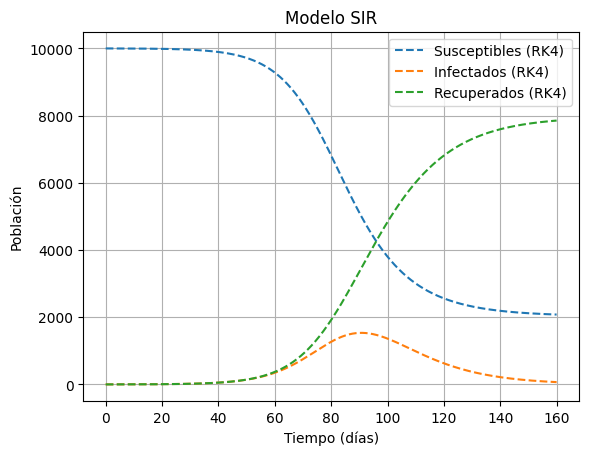

Las infecciones empiezan a descender a partir del día 90.74507450745075


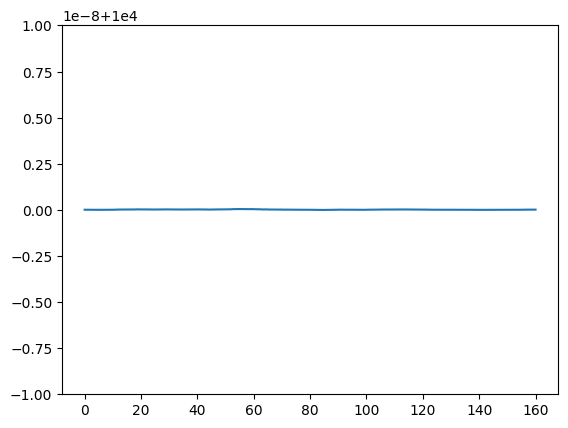

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(t,y):
  S,I,R = y
  dS_dt = -beta * (S*I/N)
  dR_dt = gamma*I
  dI_dt = beta * S * I / N - gamma * I
  return np.array([dS_dt,dI_dt ,dR_dt])

#Tamaño
N=10000

#Modelo
beta= 0.2
gamma= 0.1
#Condiciones iniciales
S0= N - 1
I0= 1
R0= 0
y0 = np.array([S0,I0,R0])
intervalos = 10000
#Parámetros del modelo
Tf=160 #Medido en días
h=0.0016
t_eval=np.linspace(0, 160, intervalos)

def runge_kutta4_nd(a, b, f, N, X0):
    # Obtengo el paso
    h = (b - a) / N
    # Defino la grilla equiespaciada
    t = np.linspace(a, b, N + 1)
    # Obtengo la dimension del problema
    n = X0.size
    # Guardo lugar para la solución de la EDO
    X = np.zeros((N+1, n))

    # Uso la condición inicial
    X[0,:]= X0
    # Obtengo la aproximación via la ecuación de recurrencia del método de Euler
    for i in range(N):
        # Calculo los K
        K1 = f(t[i], X[i,:])
        K2 = f(t[i] + h/2, X[i,:] + h / 2 * K1)
        K3 = f(t[i] + h/2, X[i,:] + h / 2 * K2)
        K4 = f(t[i] + h, X[i,:] + h * K3)
        # Uso la recurrencia
        X[i+1,:] = X[i,:] + h/6 * (K1 + 2 * K2 + 2 * K3 + K4)

    return t, X
t_rk4, y_rk4 = runge_kutta4_nd(0, 160, f,intervalos, y0)
plt.plot(t_rk4, y_rk4[:, 0], linestyle='--', label='Susceptibles (RK4)')
plt.plot(t_rk4, y_rk4[:, 1], linestyle='--', label='Infectados (RK4)')
plt.plot(t_rk4, y_rk4[:, 2], linestyle='--', label='Recuperados (RK4)')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.title('Modelo SIR')
plt.legend()
plt.grid(True)
plt.show()
#print(y_rk4)
#verificar que la poblacion se mantiene constante, para eso sumo las columnas de la matriz, como es una linea recta significa que es constante
def poblacion_constante(t,y):
    poblacion_total = []
    for i in range(len(t)):
        poblacion_total.append(sum(y[i,:]))
    return poblacion_total
a = poblacion_constante(t_rk4,y_rk4)
#print(a)
plt.plot(t_rk4,a)#es una linea recta, entonces verifica que es constante
#chequear que bajen los infectados
def infectados_baja(t,y):
    infectados = y[:,1]
    t_baja = t[0] #pongo por default el primer dia
    for i in range(1, len(t)):
        if infectados[i] < infectados[i -1]:
            t_baja = t[i]
            break

    return t_baja
baja = (infectados_baja(t_eval,y_rk4))
print("Las infecciones empiezan a descender a partir del día", baja)